# **Test 080424**

In [5]:
import pandas as pd
import json
import csv
import os

In [6]:
def read_data(file_path):
    """
       params:
           file_path: 文件路径
       return:
           data: 读取的数据列表，每行一条样本

    """
    data = []
    with open(file_path, "r") as f:
        for line in f.readlines():
            # 过长的评论文本会超出io限制报错。 暂时忽略
            try:\
                # 字符串预处理
                # 布尔替换成python的习惯
                str_text = line.replace("true", "True")
                str_text = str_text.replace("false", "False")
                # 转成字典形式
                raw_sample = json.loads(str_text)
                print(raw_sample)
                data.append(raw_sample)
            except:
                print(line)
                pass
    return data

def read_and_split_data(file_path, batch_size=10000):
    """
       params:
           file_path: 文件路径
       return:
           data: 读取的数据列表，每行一条样本

    """
    data = []
    small_list_data = []
    count = 0
    with open(file_path, "r") as f:
        for line in f.readlines():
            if count < batch_size:
                # 过长的评论文本会超出io限制报错。 暂时忽略
                try:
                    # 字符串预处理
                    # 布尔替换成python的习惯
                    str_text = line.replace("true", "True")
                    str_text = str_text.replace("false", "False")
                    # 转成字典形式
                    raw_sample = eval(str_text)
                    data.append(raw_sample)
                    count += 1
                except:
                    pass
            else:
                small_list_data.append(data)
                data = []
                count = 0
    small_list_data.append(data)
    return small_list_data

def read_txt_file_to_list(file_path):
    records = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            records.append(line.strip())
    return records


def remove_duplicate_rows(df):
    # Loại bỏ các hàng trùng lặp dựa trên cột 'reviewText'
    df = df.drop_duplicates(subset=['reviewText', 'asin', 'reviewerID'])
    return df

def remove_duplicate_rows_ver2(df):
    # Loại bỏ các hàng trùng lặp dựa trên cột 'reviewText'
    df = df.drop_duplicates(subset=['reviewText', 'itemID', 'reviewerID'])
    return df

In [7]:
file_number = 0
dataset_name = "All_Beauty_5"  # Tên của tập dữ liệu
json_file_path = "../../data/" + dataset_name + ".json"  # Thay đổi đường dẫn tới file JSON của bạn
output_directory = "data/"  # Thay đổi đường dẫn thư mục lưu file CSV của bạn
small_dataset = "Small_"+ dataset_name + "_" + str(file_number) + ".json"
chunk_size = 10000  # Kích thước của mỗi phần dữ liệu

extracted_data = output_directory + "extract/" + dataset_name + "_extracted_data_" + str(file_number) + ".csv"
filtered_data = output_directory + "filtered/" + dataset_name + "_filtered_data_" + str(file_number) + ".csv"
outliner_data = output_directory + "outliner/" + dataset_name + "_outliner_data_" + str(file_number) + ".csv"

final_json_name = dataset_name + "_Filtered" + ".json"


In [8]:

small_list_data = read_and_split_data(json_file_path, chunk_size)
count_name = 0
for data in small_list_data:
    # Chuyển đổi dữ liệu thành DataFrame
    data_df = pd.DataFrame(data)
    print(data_df)
    # data_df.columns = ['reviewerID', 'asin', 'overall', 'reviewText']

    # Lưu dữ liệu dưới dạng CSV
    output_file_path = os.path.join(output_directory + "small_data/", f"Small_{dataset_name}_{count_name}.json")
    data_df.to_json(output_file_path, orient='records', lines=True)

    print(f"Saved {len(data_df)} records to {output_file_path}")
    count_name += 1

      overall  verified   reviewTime      reviewerID        asin  \
0         5.0      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1         5.0      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2         1.0      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3         5.0     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4         5.0      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   
...       ...       ...          ...             ...         ...   
5259      5.0      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5260      5.0      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5261      5.0      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5262      5.0      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5263      5.0      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   

                                                  style     reviewerName  \
0     {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1     {'Size:': ' 7.0 oz', 'Fla

In [9]:
data = pd.read_json(output_directory + "small_data/" + small_dataset, lines=True)
print(data)
data_df = pd.DataFrame(data, columns=['reviewerID', 'asin', 'overall', 'reviewText'])
print(data_df.head())
data_df.columns = ['reviewerID', 'asin', 'overall', 'reviewText']

data_rating = data_df["overall"].tolist()
data_review = data_df["reviewText"].tolist()
data_reviewerID = data_df["reviewerID"].tolist()
data_itemID = data_df["asin"].tolist()

      overall  verified   reviewTime      reviewerID        asin  \
0           5      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1           5      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2           1      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3           5     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4           5      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   
...       ...       ...          ...             ...         ...   
5259        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5260        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5261        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5262        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   
5263        5      True  08 23, 2018   AUX122XW8ONG6  B01DLR9IDI   

                                                  style     reviewerName  \
0     {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1     {'Size:': ' 7.0 oz', 'Fla

In [10]:
print(len(data_rating))
print(len(data_reviewerID))

5264
5264


In [11]:
import pandas as pd
# step01:
def defineRating(data_rating):
  T_v = []
  for rating in data_rating:
    if rating >= 4:
      T_v.append(1)
    else:
      T_v.append(-1)
  return T_v

T_v = defineRating(data_rating)

# Define the data for the dataframe
data = {'id': range(len(T_v)), 'T_v': T_v}

# Create the dataframe
df_rating = pd.DataFrame(data)

# Print the dataframe
print(df_rating)


        id  T_v
0        0    1
1        1    1
2        2   -1
3        3    1
4        4    1
...    ...  ...
5259  5259    1
5260  5260    1
5261  5261    1
5262  5262    1
5263  5263    1

[5264 rows x 2 columns]


In [12]:
# Thêm vào dataframe df_rating cột C_v
df_rating['reviewerID'] = data_reviewerID
df_rating['asin'] = data_itemID
df_rating['overall'] = data_rating
df_rating['reviewText'] = data_review
# Loại bỏ các dòng có reviewText trùng lặp
# df_rating = remove_duplicate_rows(df_rating)
print(df_rating)

        id  T_v      reviewerID        asin  overall  \
0        0    1  A3CIUOJXQ5VDQ2  B0000530HU        5   
1        1    1  A3H7T87S984REU  B0000530HU        5   
2        2   -1  A3J034YH7UG4KT  B0000530HU        1   
3        3    1  A2UEO5XR3598GI  B0000530HU        5   
4        4    1  A3SFRT223XXWF7  B00006L9LC        5   
...    ...  ...             ...         ...      ...   
5259  5259    1   AUX122XW8ONG6  B01DLR9IDI        5   
5260  5260    1   AUX122XW8ONG6  B01DLR9IDI        5   
5261  5261    1   AUX122XW8ONG6  B01DLR9IDI        5   
5262  5262    1   AUX122XW8ONG6  B01DLR9IDI        5   
5263  5263    1   AUX122XW8ONG6  B01DLR9IDI        5   

                                             reviewText  
0                      As advertised. Reasonably priced  
1     Like the oder and the feel when I put it on my...  
2     I bought this to smell nice after I shave.  Wh...  
3     HEY!! I am an Aqua Velva Man and absolutely lo...  
4     If you ever want to feel pamper

# SODCM

# BERT

In [13]:
import nltk
import spacy
import re
import contractions
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from flair.data import Sentence
from flair.models import TextClassifier
from transformers import pipeline

# Tải các tài nguyên cần thiết từ NLTK một lần duy nhất
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Tải mô hình sentiment của Flair và spaCy chỉ một lần
tagger = TextClassifier.load('en-sentiment')
nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()
stop_words = set(stopwords.words('english'))

# Đọc các từ tích cực và tiêu cực một lần (giả sử hàm read_txt_file_to_list đã được định nghĩa)
pos_words = read_txt_file_to_list(output_directory + "positive-words.txt")
neg_words = read_txt_file_to_list(output_directory + "negative-words.txt")
print(pos_words)
print(neg_words)

# Danh sách các nhãn từ loại cần kiểm tra
word_type = ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']
brands = ['dove', 'aveda', 'silver']
keywords = ['overall', 'summary']

# Xử lý các contraction để đảm bảo không mất từ
def handle_contractions(text):
    return contractions.fix(text)

# Cải thiện việc phân tích sentiment, bao gồm việc xử lý contraction
def get_sentiment_words(text):
    text = handle_contractions(text)
    words = word_tokenize(text)
    sentiment_words = [word for word in words if word.lower() not in stop_words and sia.polarity_scores(word)['compound'] != 0]
    return sentiment_words

def sentiment_analysis_flair(sentence):
    if not sentence.strip():
        return 0.0
    
    flair_sentence = Sentence(sentence)
    tagger.predict(flair_sentence)
    
    sentiment_value = flair_sentence.labels[0].value
    sentiment_score = flair_sentence.labels[0].score
    bias = 1.75 if any(keyword.lower() in sentence.lower() for keyword in keywords) else 1.0
    
    return sentiment_score * bias if sentiment_value == 'POSITIVE' else -sentiment_score * bias

def check_string(input_value):
    return input_value if isinstance(input_value, str) else ''

# Tách câu mà không làm mất các từ cần thiết
def separate_sentences(text):
    text = check_string(text)
    text = handle_contractions(text)  # Expand contractions before splitting
    doc = nlp(text)
    sentences = []
    current_sentence = ""

    conjunctions = ["but", "and", "or", "although", "however", "because", "therefore", "meanwhile", 
                    "moreover", "nevertheless", "nonetheless", "otherwise", "thus", "yet",
                    "which", "who", "whose", "whom", "where", "when", "why", "that"]
    
    for token in doc:
        if token.is_sent_start or token.text == "\n":
            if current_sentence:
                sentences.append(current_sentence.strip())
            current_sentence = token.text
        elif token.text.lower() in conjunctions:
            if any(brand.lower() in current_sentence.lower() for brand in brands):
                current_sentence += " " + token.text
            elif current_sentence:
                sentences.append(current_sentence.strip())
                current_sentence = token.text
        else:
            current_sentence += " " + token.text

    # Check for the last sentence
    if current_sentence:
        sentences.append(current_sentence.strip())
    
    # Post-process to ensure sentences are meaningful
    processed_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        if sentence.endswith(tuple(conjunctions)) and i < len(sentences) - 1:
            # Merge with the next sentence if the sentence ends with a conjunction
            sentence += " " + sentences[i + 1]
            processed_sentences.append(sentence.strip())
        elif sentence:
            processed_sentences.append(sentence.strip())
    
    return processed_sentences

# Sentiment analyzer dùng transformer
sentiment_analyzer = pipeline("sentiment-analysis")

def split_sentences_and_filter_sentiment(text):
    sentences = separate_sentences(text)
    if len(sentences) == 1 and not re.search(r'[.!?]', text):
        sentences = [text]

    filtered_sentences = []

    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue

        words = word_tokenize(sentence)
        
        # Contextual sentiment analysis
        contains_sentiment = (any(sia.polarity_scores(word)['compound'] != 0 for word in words) or
                              any(word.lower() in pos_words or word.lower() in neg_words for word in words))

        # Flair POS tagging to identify important POS tags (like adjectives)
        sentence_flair = Sentence(sentence)
        tagger.predict(sentence_flair)
        is_a = any(
            label.value in word_type for token in sentence_flair.tokens for label in token.get_labels('pos')
        )

        # If a brand is mentioned, reset sentiment and classification
        if any(word.lower() in brands for word in words):
            contains_sentiment = False
            is_a = False

        if contains_sentiment or is_a:
            filtered_sentences.append(sentence)
        # else:
        #     print("remove: ", sentence)

    if not filtered_sentences:
        filtered_sentences = sentences

    return filtered_sentences



/home/triet/ComputerScience_K32/Final_Project/.venv/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/triet/ComputerScience_K32/Final_Project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-10 23:02:00.382293: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_O

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [14]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load pre-trained model and tokenizer for Amazon reviews
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'  # Example model, you can choose other pre-trained models
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

/home/triet/ComputerScience_K32/Final_Project/.venv/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


# Processing Data

In [15]:

predictRating = []
text = "Lavender water. This has a nice scent and the sprayer sprays well, but it is so weak that the scent disappears within a few minutes If I spray more, the sheets get damp. I received a free bottle in exchange for an honest review and I was pretty excited about having lavender-scented sheets, but I won't be buying any of this item and can't recommend it. I have tried this company's soaps, though, and they are wonderfult"
# text = remove_stopwords(text)


sentences = split_sentences_and_filter_sentiment(text)
print(sentences)
total_sentiment = 0
for sentence in sentences:
    # sentence = remove_stopwords(sentence)
    score = sentiment_analysis_flair(sentence)
    print(sentence, score)
    total_sentiment += score
    # print(total_sentiment)
print(total_sentiment)
if total_sentiment/len(sentences) < -0.2:
    predictRating.append(-1)
    print("Result: -1")
else:
    predictRating.append(1)
    print("Result: 1")

['This has a nice scent', 'and the sprayer sprays well ,', 'but it is so weak', 'that the scent disappears within a few minutes If I spray more , the sheets get damp .', 'I received a free bottle in exchange for an honest review', 'and I was pretty excited about having lavender - scented sheets ,', 'and can not recommend it .']
This has a nice scent 0.9989726543426514
and the sprayer sprays well , 0.9956420660018921
but it is so weak -0.9988552331924438
that the scent disappears within a few minutes If I spray more , the sheets get damp . -0.9928511381149292
I received a free bottle in exchange for an honest review -0.9835716485977173
and I was pretty excited about having lavender - scented sheets , 0.9977580904960632
and can not recommend it . -0.9979724287986755
-0.9808776378631592
Result: 1


In [16]:
import tqdm
import os

predictRating = []



def process_and_save(df_rating, output_file):


    output_df = pd.DataFrame(columns=['reviewerID', 'asin', 'predictRating', 'T_v', 'overall', 'reviewText', 'filteredReviewText'])
    score = 0
    # Đoạn mã dùng tqdm để hiển thị tiến trình %
    for i, row in tqdm.tqdm(df_rating.iterrows(), desc="Processing", total=len(df_rating)):
        # filtered_sentences = []
        sentences = split_sentences_and_filter_sentiment(row['reviewText'])
        # filtered_sentences.append(" ".join(sentences))
        
        if not sentences:
            print(f"Warning: No sentences after filtering for review ID {row['reviewerID']} and asin {row['asin']}")

        total_sentiment = sum(sentiment_analysis_flair(sentence) for sentence in sentences)
        if total_sentiment >= -0.2:
            score = 1
        else:
            score = -1
        predictRating.append(score)
        # Lưu vào DataFrame và ghi vào file CSV sau mỗi 10 record
        output_df.loc[len(output_df)] = { 'reviewerID': row['reviewerID'],
                                          'asin': row['asin'],
                                          'predictRating': score,
                                          'T_v': row['T_v'],
                                          'overall': row['overall'],
                                          'reviewText': row['reviewText'],
                                          'filteredReviewText': " ".join(sentences) }
        
        if (i + 1) % 1000 == 0:
            output_df.to_csv(output_file, mode='a', header=not os.path.exists(output_file), index=False)
            output_df = pd.DataFrame(columns=['reviewerID', 'asin', 'predictRating', 'T_v', 'overall', 'reviewText', 'filteredReviewText'])
    
    # Ghi phần còn lại của DataFrame vào file CSV
    if not output_df.empty:
        output_df.to_csv(output_file, mode='a', header=not os.path.exists(output_file), index=False)

# Sử dụng hàm
process_and_save(df_rating, extracted_data)


Processing:   0%|          | 0/5264 [00:00<?, ?it/s]

Processing:   7%|▋         | 362/5264 [00:41<06:38, 12.31it/s]

Processing:  35%|███▌      | 1864/5264 [04:03<03:58, 14.25it/s]  

Processing:  53%|█████▎    | 2785/5264 [05:57<03:34, 11.53it/s]

Processing:  72%|███████▏  | 3774/5264 [08:13<01:51, 13.32it/s]

Processing:  87%|████████▋ | 4557/5264 [09:57<00:40, 17.33it/s]

Processing: 100%|██████████| 5264/5264 [12:32<00:00,  6.99it/s]


In [17]:
import numpy as np

output = pd.read_csv(extracted_data)
output_df = pd.DataFrame(output)
print("Length Original Dataset: ", len(output_df))

outliner_rows = []
filtered_rows = []

# Lặp qua từng dòng trong output_df
for i, row in output_df.iterrows():
    row['overall_new'] = row['overall']  # Khởi tạo giá trị của overall_new bằng giá trị của overall
    
    if row['predictRating'] != row['T_v']:
        current_asin = row['asin']
        median_value = output_df[output_df['asin'] == current_asin]['overall'].quantile(0.5) 
        
        row['overall_new'] = float(round((row['overall'] + median_value) / 2))  # Thay đổi giá trị của overall_new nếu có xung đột
        # print(row['overall_new'])
        print(row)
        outliner_rows.append(row)  # Thêm dòng vào danh sách outliner
    filtered_rows.append(row)  # Thêm dòng vào danh sách filteredRecords

# Tạo DataFrames từ các danh sách dòng
outliner = pd.DataFrame(outliner_rows)
filteredRecords = pd.DataFrame(filtered_rows)

# Ghi DataFrames ra các file CSV
outliner.to_csv(outliner_data, index=False, float_format='%.6f')
filteredRecords.to_csv(filtered_data, index=False, float_format='%.6f')


Length Original Dataset:  5264
reviewerID                                               A24W4W9E62FZP2
asin                                                         B00006L9LC
predictRating                                                         1
T_v                                                                  -1
overall                                                               2
reviewText            No change my scalp still itches like crazy. It...
filteredReviewText    No change my scalp still itches like crazy . I...
overall_new                                                         4.0
Name: 7, dtype: object
reviewerID                                               A1YVFD3TLX6E22
asin                                                         B00006L9LC
predictRating                                                        -1
T_v                                                                   1
overall                                                               4
reviewText

In [18]:
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Tải các dữ liệu cần thiết từ NLTK
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def remove_stopwords_and_punctuation(text):
    # Kiểm tra nếu text là None hoặc NaN
    if pd.isnull(text):
        return ""  # Trả về chuỗi rỗng nếu text là None hoặc Na09N
    
    # Thay thế các chuỗi đặc biệt như \n, \/ bằng khoảng trắng
    text = text.replace("\n", " ").replace("\\/", " ").replace("\\\"", " ").replace("`","").replace("\"","")

    # # Tokenize và loại bỏ stop-words và dấu chấm phẩy
    # words = word_tokenize(text)
    # filtered_words = [word for word in words if word not in stop_words and word not in punctuation]
    
    # return ' '.join(filtered_words)
    return text

# Load json data to dataframe
raw_data = pd.read_json(output_directory + "small_data/" + small_dataset, lines=True)
print("Dataset: ", len(raw_data))

tqdm.pandas()  # Sử dụng tqdm để theo dõi tiến trình
raw_data['filteredReviewText'] = raw_data['reviewText'].progress_apply(remove_stopwords_and_punctuation)

# Tạo các cột mới để concat reviewerID, asin, và reviewText
raw_data['combined_key'] = raw_data['reviewerID'].astype(str) + raw_data['asin'].astype(str) + raw_data['reviewText'].astype(str)
filteredRecords['combined_key'] = filteredRecords['reviewerID'].astype(str) + filteredRecords['asin'].astype(str) + filteredRecords['reviewText'].astype(str)

# Tạo cột filteredReviewText và overall_new trong raw_data nếu chưa có
raw_data['filteredReviewText'] = None
raw_data['overall_new'] = raw_data['overall']

# Duyệt qua từng dòng của raw_data và tìm trong filteredRecords để fill dữ liệu
for index, row in tqdm(raw_data.iterrows(), total=len(raw_data)):
    combined_key = row['combined_key']
    
    # Tìm hàng tương ứng trong filteredRecords
    matching_row = filteredRecords[filteredRecords['combined_key'] == combined_key]
    
    if not matching_row.empty:
        # Nếu tìm thấy hàng matching, điền các giá trị filteredReviewText và overall_new
        raw_data.at[index, 'filteredReviewText'] = matching_row['filteredReviewText'].values[0]
        raw_data.at[index, 'overall_new'] = matching_row['overall_new'].values[0]

# Xóa cột 'combined_key' sau khi sử dụng
raw_data = raw_data.drop(columns=['combined_key'])
filteredRecords = filteredRecords.drop(columns=['combined_key'])


# Lưu toàn bộ DataFrame với cột filteredReviewText
raw_data.to_json(output_directory + small_dataset, orient='records', lines=True)

# Load lại dữ liệu từ file JSON (nếu cần)
data_filtered = pd.read_json(output_directory + small_dataset, lines=True)

print("Final dataset length: ", len(data_filtered))


[nltk_data] Downloading package stopwords to /home/triet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/triet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Dataset:  5264


100%|██████████| 5264/5264 [00:01<00:00, 2741.54it/s]


Final dataset length:  5264


In [23]:
import os
import glob
import shutil

def backup_and_delete_files(folder_path, backup_path, backup_folder_name, date, extensions=[".csv"]):
    # Tạo đường dẫn tới thư mục sao lưu
    backup_folder_path = os.path.join(backup_path, backup_folder_name + "_" + date)
    print(f"Thư mục sao lưu: {backup_folder_path}")
    
    # Tạo thư mục sao lưu nếu chưa tồn tại
    if not os.path.exists(backup_folder_path):
        print(f"Tạo thư mục sao lưu mới: {backup_folder_path}")
        os.makedirs(backup_folder_path)
    
    # Lặp qua từng loại file extension để sao lưu và xóa các file tương ứng
    for ext in extensions:
        # Tạo danh sách các tệp với phần mở rộng cụ thể trong thư mục gốc
        files = glob.glob(os.path.join(folder_path, f"*{ext}"))

        # Sao chép các tệp vào thư mục sao lưu và sau đó xóa chúng khỏi thư mục gốc
        for file_path in files:
            try:
                # Sao chép tệp vào thư mục sao lưu
                shutil.copy(file_path, backup_folder_path)
                print(f"Đã sao chép: {file_path} tới {backup_folder_path}")
                
                # Xóa tệp từ thư mục gốc
                os.remove(file_path)
                print(f"Đã xóa: {file_path}")
            except Exception as e:
                print(f"Không thể sao chép hoặc xóa {file_path}. Lỗi: {e}")

# Ví dụ sử dụng:
backup_and_delete_files("feature", "backup", "BKfeature", "170824", extensions=[".csv"])
backup_and_delete_files("feature_originalmethod", "backup", "BKfeature_originalmethod", "170824", extensions=[".csv"])
backup_and_delete_files("data", "backup", "BKdata", "170824", extensions=[".csv"])
backup_and_delete_files("chkpt", "backup", "BK_chkpt", "170824", extensions=[".pt", ".pkl", "npz"])
backup_and_delete_files("output", "backup", "BK_output", "170824", extensions=[".model"])


Thư mục sao lưu: backup/BKfeature_170824
Thư mục sao lưu: backup/BKfeature_originalmethod_170824
Thư mục sao lưu: backup/BKdata_170824
Thư mục sao lưu: backup/BK_chkpt_170824
Đã sao chép: chkpt/bert_last_checkpoint.pt tới backup/BK_chkpt_170824
Đã xóa: chkpt/bert_last_checkpoint.pt
Thư mục sao lưu: backup/BK_output_170824
Đã sao chép: output/word2vecDeepCGSR.model tới backup/BK_output_170824
Đã xóa: output/word2vecDeepCGSR.model


# Merge json

In [15]:
import pandas as pd

# Đường dẫn tới tệp JSON cần lưu
merged_json = output_directory + "Small_"+ dataset_name + "_" + str(file_number)  + "_switch_data.json"
print(merged_json)

# Đọc dữ liệu từ tệp JSON hiện có
data_filtered = pd.read_json(output_directory + small_dataset, lines=True)
print(len(data_filtered))

# Tạo một bản sao của DataFrame và hoán đổi hai cột
new_dataframe = data_filtered.copy()

# Hoán đổi hai cột
new_dataframe[['reviewText', 'filteredReviewText']] = data_filtered[['filteredReviewText', 'reviewText']]
new_dataframe[['overall', 'overall_new']] = data_filtered[['overall_new', 'overall']]
# Lưu DataFrame đã hoán đổi cột dưới dạng JSON
new_dataframe.to_json(merged_json, orient='records', lines=True)


data/Small_All_Beauty_5_0_switch_data.json
5264


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm  # Import thư viện tqdm


class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',  # Tự động padding các chuỗi văn bản ngắn hơn max_len
            truncation=True,  # Cắt bớt các chuỗi dài hơn max_len
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


def collate_fn(batch):
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    labels = [item['labels'] for item in batch]
    
    # Pad input_ids và attention_mask đến kích thước của chuỗi dài nhất trong batch
    input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_mask = pad_sequence(attention_mask, batch_first=True, padding_value=0)
    
    labels = torch.tensor(labels, dtype=torch.long)
    
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels
    }

def fine_tune_bert(texts, labels, num_labels, epochs=3, batch_size=8, max_len=512, learning_rate=2e-5):
    # Chia dữ liệu thành train/test
    train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.1, random_state=42)

    # Khởi tạo tokenizer và dataset
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    train_dataset = CustomDataset(train_texts, train_labels, tokenizer, max_len)
    val_dataset = CustomDataset(val_texts, val_labels, tokenizer, max_len)

    # DataLoader với collate_fn
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # Load pre-trained BERT và fine-tune cho classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

    # Optimizer
    optimizer = AdamW(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(epochs):  # Số epoch
        model.train()
        total_loss = 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch")
        
        for batch in progress_bar:
            optimizer.zero_grad()
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

            progress_bar.set_postfix({"Loss": total_loss / len(progress_bar)})

    # Đánh giá mô hình sau khi fine-tune
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.2f}')

    return model, accuracy


# Fine-gain

In [ ]:
!pip install vaderSentiment

In [44]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from gensim import corpora
from gensim.models import LdaModel
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.parse.stanford import StanfordDependencyParser
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch
import sys
import os
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
from gensim.models import word2vec, Word2Vec



class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',  # Tự động padding các chuỗi văn bản ngắn hơn max_len
            truncation=True,  # Cắt bớt các chuỗi dài hơn max_len
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def collate_fn(tokenizer):
    def collate_batch(batch):
        input_ids = [item['input_ids'] for item in batch]
        attention_mask = [item['attention_mask'] for item in batch]
        labels = [item['labels'] for item in batch]
        
        # Pad input_ids và attention_mask đến kích thước của chuỗi dài nhất trong batch
        input_ids = pad_sequence(input_ids, batch_first=True, padding_value=tokenizer.pad_token_id)
        attention_mask = pad_sequence(attention_mask, batch_first=True, padding_value=0)
        
        labels = torch.tensor(labels, dtype=torch.long)
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
        }
    return collate_batch

def fine_tune_bert(texts, labels, num_labels, epochs=3, batch_size=8, max_len=512, learning_rate=2e-5, save_dir='chkpt'):
    # Khởi tạo tokenizer và dataset
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    dataset = CustomDataset(texts, labels, tokenizer, max_len)

    # DataLoader với collate_fn
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn(tokenizer))

    # Load pre-trained BERT và optimizer
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
    optimizer = AdamW(model.parameters(), lr=learning_rate)

    start_epoch = 0
    checkpoint_path = os.path.join(save_dir, "bert_last_checkpoint.pt")

    # Kiểm tra xem checkpoint có tồn tại không
    if os.path.exists(checkpoint_path):
        print(f"Checkpoint found at {checkpoint_path}. Loading checkpoint.")
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        start_epoch = checkpoint['epoch']
        print(f"Resuming training from epoch {start_epoch + 1}")
        return model, tokenizer

    # Training loop
    for epoch in range(start_epoch, epochs):  # Bắt đầu từ epoch đã lưu
        model.train()
        total_loss = 0
        progress_bar = tqdm(loader, desc=f"Epoch {epoch + 1}/{epochs}", unit="batch")
        
        for batch in progress_bar:
            optimizer.zero_grad()
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['labels']

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

            progress_bar.set_postfix({"Loss": total_loss / len(progress_bar)})

        # Lưu mô hình sau mỗi epoch
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': total_loss / len(loader)
        }, checkpoint_path)
        
        print(f"Epoch {epoch + 1} complete. Model saved to {checkpoint_path}.")

    print(f"Training complete. Final loss: {total_loss / len(loader):.4f}")

    return model, tokenizer


# Load pre-trained BERT model and tokenizer
def get_tbert_model(data_df, split_data, num_topics, num_words):
    """ T-BERT模型训练词表构建主题单词矩阵获取 """
    # Load pre-trained BERT model and tokenizer
    # model_name = 'bert-base-uncased'
    # tokenizer = BertTokenizer.from_pretrained(model_name)
    # model = BertModel.from_pretrained(model_name)
    cleaned_data = data_df.dropna(subset=['filteredReviewText', 'overall_new'])
    cleaned_data.loc[:, 'overall_new'] = cleaned_data['overall_new'].apply(lambda x: 1 if x > 3 else 0)

    # Lấy danh sách reviews và labels từ dữ liệu đã làm sạch và chuyển đổi
    texts = cleaned_data['filteredReviewText'].tolist()
    labels = cleaned_data['overall_new'].tolist()
    
    model, tokenizer = fine_tune_bert(texts, labels, num_labels=2, epochs=2)
    
    # Tokenize and get BERT embeddings for each document
    def get_bert_embeddings(texts):
        inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model.bert(**inputs)
        return outputs.last_hidden_state.mean(dim=1)
    
    # Generate embeddings for all documents
    embeddings = []
    for text in split_data:
        embedding = get_bert_embeddings([' '.join(text)])
        embeddings.append(embedding)
    embeddings = torch.vstack(embeddings)

    # Clustering to find topics
    kmeans = KMeans(n_clusters=num_topics, random_state=0).fit(embeddings.numpy())
    labels = kmeans.labels_
    
    # Extract top words for each topic
    topic_to_words = []
    for i in range(num_topics):
        cluster_indices = [j for j, label in enumerate(labels) if label == i]
        cluster_texts = [' '.join(split_data[j]) for j in cluster_indices]
        
        vectorizer = TfidfVectorizer(max_features=num_words)
        tfidf_matrix = vectorizer.fit_transform(cluster_texts)
        
        indices = np.argsort(tfidf_matrix.sum(axis=0)).flatten()[::-1]
        feature_names = vectorizer.get_feature_names_out()
        top_words = [feature_names[ind] for ind in indices[:num_words]]
        topic_to_words.append(top_words)
    
    # Create a dummy dictionary for compatibility
    dictionary = corpora.Dictionary(split_data)
    # corpus = [dictionary.doc2bow(text) for text in split_data]
    return embeddings, model, kmeans, dictionary, topic_to_words

# Get sentiment score for each topic
class DependencyParser():
    def __init__(self, model_path, parser_path):
        self.model = StanfordDependencyParser(path_to_jar=parser_path, path_to_models_jar=model_path)

    def raw_parse(self, text):
        parse_result = self.model.raw_parse(text)
        result = [list(parse.triples()) for parse in parse_result]
        return result[0]

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_word_sentiment_score_2(word):
    sentiment_dict = analyzer.polarity_scores(word)
    return sentiment_dict['compound']

def get_top_synonyms(word, top_n=4):
    # Tìm các synset liên quan đến từ cho danh từ, động từ, và tính từ
    noun_synsets = wn.synsets(word, pos=wn.NOUN)
    # verb_synsets = wn.synsets(word, pos=wn.VERB)
    adj_synsets = wn.synsets(word, pos=wn.ADJ)

    # Kết hợp tất cả các synset lại thành một danh sách
    all_synsets = noun_synsets  + adj_synsets

    # Tạo danh sách các từ đồng nghĩa kèm theo điểm sentiment
    synonym_scores = []
    for synset in all_synsets:
        for lemma in synset.lemma_names():
            if lemma.lower() != word.lower() and lemma not in [syn[0] for syn in synonym_scores]:
                synonym_scores.append((lemma))

    # Sắp xếp danh sách theo điểm sentiment giảm dần
    # synonym_scores.sort(key=lambda x: abs(x[1]), reverse=True)

    # Trả về top 3-4 từ có điểm sentiment cao nhất
    # top_synonyms = [synonym for synonym, score in synonym_scores[:top_n]]
    return synonym_scores[:top_n]

def get_word_sentiment_score(word):
    m = list(swn.senti_synsets(word))
    s = 0
    if not m:
        return s  # Trả về 0 nếu không tìm thấy synset nào cho từ này
    for synset in m:
        if(synset.pos_score() == 0 and synset.neg_score() == 0):
            s += get_word_sentiment_score_2(synset.synset.name().split('.')[0])
        else:
            s += (synset.pos_score() - synset.neg_score())
    return s

def get_synonyms_sentiment_scores(word, top_n=4):
    synonyms = get_top_synonyms(word, top_n=top_n)
    print(synonyms)
    scores = 0
    
    for synonym in synonyms:
        sentiment_score = get_word_sentiment_score(synonym)
        scores += sentiment_score
        # print(f"Sentiment score for '{synonym}': {sentiment_score}")
    print("Score: ", scores)
    return scores


def preprocessed(text):
    """ 3文本预处理
    """
    # 分句和词性还原， 目前只实现分句
    return text.split("\.")

# stop_words = stopwords.words("english") + list(string.punctuation)
def word_segment(text):
    # word_seg = [i for i in word_tokenize(str(text).lower()) if i not in stop_words]
    # word_seg = text.split(" ")
    word_seg = [i for i in word_tokenize(str(text).lower())]
    return word_seg

def get_topic_sentiment_matrix_tbert(text, topic_word_matrix, dependency_parser, topic_nums=50):
    topic_sentiment_m = np.zeros(topic_nums)
    sentences = preprocessed(text)
    dep_parser_result_p = []
    for i in sentences:
        dep_parser_result = dependency_parser.raw_parse(i)
        for j in dep_parser_result:
            dep_parser_result_p.append([j[0][0], j[2][0]])
            
    for topic_id, cur_topic_words in enumerate(topic_word_matrix):
        cur_topic_sentiment = 0
        cur_topic_senti_word = []
        for word in word_segment(text):
            if any(word in sublist for sublist in cur_topic_words):
                # print("cur_topic_senti_word", cur_topic_senti_word)
                cur_topic_senti_word.append(word)
                for p in dep_parser_result_p:
                    # print(p)
                    if p[0] == word:
                        cur_topic_senti_word.append(p[1])
                    if p[1] == word:
                        cur_topic_senti_word.append(p[0])

        cur_topic_sentiment = sum(get_synonyms_sentiment_scores(senti_word) for senti_word in cur_topic_senti_word)
        topic_sentiment_m[topic_id] = np.clip(cur_topic_sentiment, -5, 5)
    return topic_sentiment_m

def get_word2vec_model(is_train, model_path, split_data=None, vector_size=None, min_count=None, window=None):
    """word2vec训练代码
    """
    if is_train:
        model = word2vec.Word2Vec(split_data, vector_size=vector_size, min_count=min_count, window=window)
        model.save(model_path)
    else:
        model = Word2Vec.load(model_path)
    return model


model_path = 'config/stanford-corenlp-4.5.7/stanford-corenlp-4.5.7-models.jar'
parser_path = 'config/stanford-corenlp-4.5.7/stanford-corenlp-4.5.7.jar'
dep_parser = DependencyParser(model_path, parser_path)
num_topics = 10
num_words = 300
window_size = 3
min_count = 1
vector_size = 200
model_path = "output/word2vec.model"
is_train = True # 是否训练



/tmp/ipykernel_3432180/2402312558.py:188: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  self.model = StanfordDependencyParser(path_to_jar=parser_path, path_to_models_jar=model_path)


In [42]:
split_data = []
train_data_list = data_filtered['filteredReviewText'].tolist()
for i in train_data_list:
    split_data.append(word_segment(i))
word2vec_model = get_word2vec_model(is_train=is_train,
                        model_path=model_path,
                        split_data=split_data,
                        vector_size=vector_size,
                        min_count=min_count,
                        window=window_size)

embeddings, model, kmeans, dictionary, topic_word_matrix = get_tbert_model(data_filtered, split_data, num_topics, num_words)


Checkpoint found at chkpt/bert_last_checkpoint.pt. Loading checkpoint.
Resuming training from epoch 2


In [ ]:
print(get_word_sentiment_score_2("Excellent"))
def clean_text(text):
    # Loại bỏ các dấu chấm liên tiếp
    text = re.sub(r'\.{2,}', '', text)
    return text
def split_text(text, max_length=300):
    text = clean_text(text)
    sentences = text.split('. ')
    chunks = []
    current_chunk = []
    try:
        for sentence in sentences:
            if len(' '.join(current_chunk + [sentence])) > max_length:
                chunks.append(' '.join(current_chunk))
                current_chunk = [sentence]
            else:
                current_chunk.append(sentence)
        if current_chunk:
            chunks.append(' '.join(current_chunk))
    except:
        print("split_text", text)
    # for sentence in sentences:
    #     if len(' '.join(current_chunk + [sentence])) > max_length:
    #         chunks.append(' '.join(current_chunk))
    #         current_chunk = [sentence]
    #     else:
    #         current_chunk.append(sentence)
    # if current_chunk:
    #     chunks.append(' '.join(current_chunk))
    return chunks
print(split_text("loves makes hair soft helped dry scalp .. wish came larger size"))

0.5719
['loves makes hair soft helped dry scalp  wish came larger size']


In [46]:

text = "Amazon encoded at 256 kpbs . where previously known as "" The Moments "" with the hit "" Love On A Two - Way Street ""  also a major hit for Stacy Lattisaw in 1981  . Classic 1970 's sound . Ray died at age 45 . His smooth voice is missed ."
fine_feature_chunk = get_topic_sentiment_matrix_tbert(text, topic_word_matrix, dep_parser, topic_nums=num_topics)

print("fine_feature: ", fine_feature_chunk)

['virago', 'Amazon_River']
Score:  0.1779
['hitting', 'striking', 'smash', 'smasher']
Score:  -3.2836999999999996
['passion', 'beloved', 'dear', 'dearest']
Score:  7.2636
[]
Score:  0
[]
Score:  0
['angstrom', 'angstrom_unit', 'vitamin_A', 'antiophthalmic_factor']
Score:  -0.25
['John_Major', 'John_R._Major', 'John_Roy_Major']
Score:  0.0
[]
Score:  0
['2', 'II', 'deuce', 'deuce']
Score:  -1.3194
['hitting', 'striking', 'smash', 'smasher']
Score:  -3.2836999999999996
['passion', 'beloved', 'dear', 'dearest']
Score:  7.2636
[]
Score:  0
[]
Score:  0
['angstrom', 'angstrom_unit', 'vitamin_A', 'antiophthalmic_factor']
Score:  -0.25
['John_Major', 'John_R._Major', 'John_Roy_Major']
Score:  0.0
[]
Score:  0
['auditory_sensation', 'audio', 'phone', 'speech_sound']
Score:  0.0
['lost']
Score:  -8.107
[]
Score:  0
['authoritative', 'classical', 'definitive', 'classical']
Score:  1.75
[]
Score:  0
[]
Score:  0
['vocalization', 'vocalisation', 'vocalism', 'phonation']
Score:  0.0
['lost']
Score:

# Test

In [ ]:
import pandas as pd

# Đọc dữ liệu
raw_data = pd.read_csv("data/filtered/All_Beauty_5_filtered_data_0.csv")

# Loại bỏ các bản ghi có giá trị null trong cột 'filteredReviewText' hoặc 'overall_new'
cleaned_data = raw_data.dropna(subset=['filteredReviewText', 'overall_new'])

# Chuyển đổi cột 'overall_new' thành giá trị nhị phân
# Gán 1 cho những giá trị lớn hơn 3, ngược lại gán 0
cleaned_data['overall_new'] = cleaned_data['overall_new'].apply(lambda x: 1 if x > 3 else 0)

# Kiểm tra lại số lượng bản ghi sau khi chuyển đổi
print(f"Số lượng bản ghi sau khi chuyển đổi: {len(cleaned_data)}")

# Lấy danh sách reviews và labels từ dữ liệu đã làm sạch và chuyển đổi
reviews = cleaned_data['filteredReviewText'].tolist()
true_labels = cleaned_data['overall_new'].tolist()

# Sử dụng các danh sách này cho quá trình fine-tune BERT
texts = reviews  # Dữ liệu văn bản
labels = true_labels  # Nhãn nhị phân 0 và 1

# Fine-tune BERT
model, accuracy = fine_tune_bert(texts, labels, num_labels=2, epochs=2)


In [ ]:
import pandas as pd

# Đọc file JSON dưới dạng DataFrame
df_json = pd.read_json('../../data/All_Beauty_5.json', lines=True)
print(df_json)
# Đọc file CSV dưới dạng DataFrame
df_csv = pd.read_csv('feature/allFeatureReview_train.csv')
# print(df_csv)

# Giả sử bạn muốn mapping dựa trên cột 'reviewerID' và 'itemID' trong cả hai DataFrame
# và lấy giá trị từ 'column_from_json' để gán vào 'column_in_csv' trong df_csv

# Thực hiện merge hai DataFrame dựa trên hai cột 'reviewerID' và 'itemID'
merged_df = df_csv.merge(df_json[['reviewerID', 'asin', 'overall']], 
                         on=['reviewerID', 'itemID'], 
                         how='left')

# Sau đó, cập nhật cột 'column_in_csv' với giá trị từ 'column_from_json'
merged_df['overall'] = merged_df['overall']

# Xóa cột 'column_from_json' nếu không cần thiết
# merged_df = merged_df.drop(columns=['column_from_json'])

# Lưu DataFrame kết quả dưới dạng CSV
merged_df.to_csv('output_file.csv', index=False)

print("Quá trình hoàn thành và file đã được lưu thành công.")


In [20]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Hàm tính coarse gain với BERT sentiment
def get_coarse_gain_sentiment(text, bert_sentiment_model, tokenizer):
    # Tokenize câu và lấy embedding từ BERT sentiment model
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    
    with torch.no_grad():
        outputs = bert_sentiment_model(**inputs)
    
    # Lấy điểm sentiment từ output của BERT (logits)
    logits = outputs.logits
    sentiment_score = torch.softmax(logits, dim=1)

    # Ở đây, coarse gain có thể được dựa trên sentiment score
    # Ví dụ: Lấy giá trị sentiment ở lớp positive nhất (cuối cùng) làm coarse gain
    coarse_gain = sentiment_score[0][-1].item()  # Lớp cuối cùng đại diện cho positive sentiment

    return coarse_gain

# Load mô hình BERT đã fine-tuned cho sentiment và tokenizer
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
bert_sentiment_model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Gọi hàm với câu text
text = "Bought for a funeral slide show. Dont like it but i guess good for what it is. The clients liked it"
coarse_gain = get_coarse_gain_sentiment(text, bert_sentiment_model, tokenizer)
print(f"Coarse Gain (Sentiment-based): {coarse_gain}")


Coarse Gain (Sentiment-based): 0.036408908665180206


In [12]:
#read file json and convert to csv
import pandas as pd

# Đọc file JSON dưới dạng DataFrame
df_json = pd.read_json('../../data/base_data.json', lines=True)
# print(df_json)

# Convert column name HotelID to asin and ReviewerID to reviewerID and rating to overall
df_json.rename(columns={'Hotel_ID': 'asin', 'User_id': 'reviewerID', 'rating': 'overall', 'review_text': 'reviewText'}, inplace=True)

# Convert rating 1 to 10 become 1 to 5
df_json['overall'] = df_json['overall'].apply(lambda x: x / 2)

print(df_json)
# Lưu dataframe df_json dưới dạng Json
# df_json.to_json('../../data/HotelReview.json', index=False)
# Lưu dataframe df_json dưới dạng CSV
df_json.to_csv('../../data/HotelReview.csv', index=False)
# Lưu dataframe df_json dưới dạng Json
df_json.to_json('../../data/HotelReview.json', orient='records', lines=True)

            asin user_Name      user_Country  \
0     LONaVUyDWU    Michal          Slovakia   
1     YP8pjY94l3     Conor   Vương Quốc Anh   
2     OqxMyixu19       Suk        Hàn Quốc   
3     mNcuTmP9J9     Kevin         Indonesia   
4     IVy3Ugsw9Z        Lê         Việt Nam   
...          ...       ...               ...   
7003  2hBwYadqil    Kennic         Singapore   
7004  FIS4CdV9qR      Eoin  Ireland (Ai Len)   
7005  rtNTqDI5dr   Candice         Việt Nam   
7006  0zMIem3D65        Nu               Mỹ   
7007  _zAax66WHq     Marei              Đức   

                                             reviewText  overall  reviewerID  
0     Beautiful place Ak the karaoke around. Every d...      4.0        3415  
1     Cannot thank and applaud the staff enough. Ver...      5.0        1000  
2                   Staff helpful, good location, clean      5.0        4667  
3     the room is very clean. Well maintained. The o...      5.0        2613  
4     very convenient as the

In [16]:
import pandas as pd

# Read the JSON file
df = pd.read_json('/home/triet/ComputerScience_K32/Final_Project/model/DeepCGSR/data/Small_HotelReview_AspectTerm_0.json',  lines=True)

# Append '_abc' to all values in the 'reviewerID' column
df['reviewerID'] = df['reviewerID'].astype(str) + '_abc'
# Convert rating 1 to 10 become 1 to 5
df['overall'] = df['overall'].apply(lambda x: x / 2)
df['overall_new'] = df['overall_new'].apply(lambda x: x / 2)

# Save the modified DataFrame back to a JSON file (optional)
df.to_json('/home/triet/ComputerScience_K32/Final_Project/model/DeepCGSR/data/Small_HotelReview_AspectTerm_0.json', orient='records', lines=True)

print(df.head())  # Display first few rows to confirm changes


         asin                                         reviewText  overall  \
0  LONaVUyDWU  Beautiful place Ak the karaoke around. Every d...      4.0   
1  YP8pjY94l3  Cannot thank and applaud the staff enough. Ver...      5.0   
2  OqxMyixu19                Staff helpful, good location, clean      5.0   
3  mNcuTmP9J9  the room is very clean. Well maintained. The o...      5.0   
4  IVy3Ugsw9Z  very convenient as the place is in front of th...      5.0   

  reviewerID                                 filteredReviewText  overall_new  
0   1027_abc  Beautiful place Ak the karaoke around . Crazy ...          4.0  
1    292_abc  Can not thank and applaud the staff enough . V...          5.0  
2   1368_abc                Staff helpful, good location, clean          5.0  
3    801_abc  the room is very clean . Well maintained . and...          5.0  
4    938_abc  very convenient as the place is in front of th...          5.0  


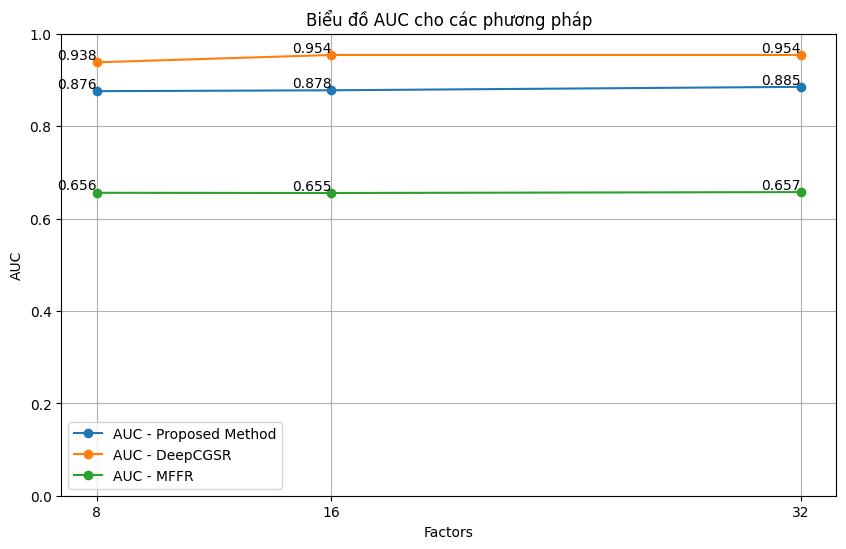

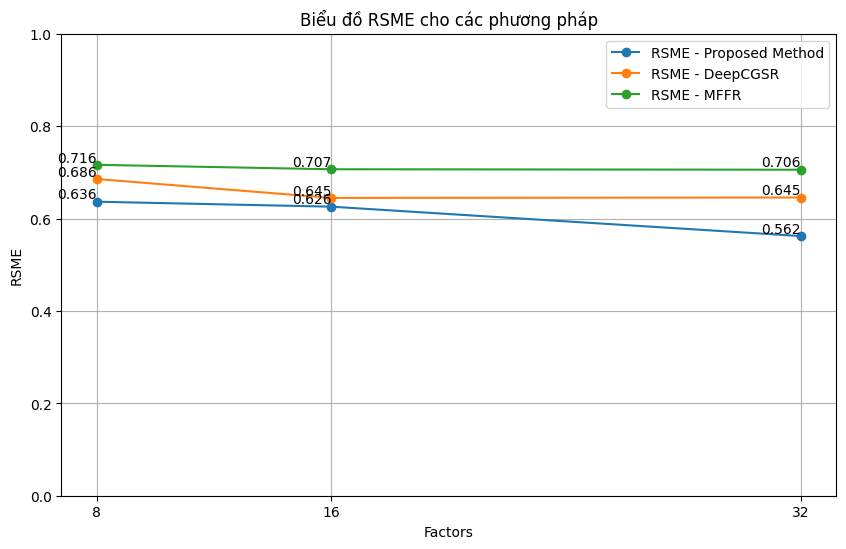

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Đường dẫn đến các file Excel
file_paths = [
    # '../results/ProposedMethod/ResultCollection_AllBeauty_ProposedMethod.xlsx',
    # '../results/DeepCGSR/ResultCollection_AllBeauty_DeepCGSR.xlsx',
    # '../results/MFFR/ResultCollection_AllBeauty_MFFR.xlsx'
    '../results/ProposedMethod/ResultCollection_DigitalMusic_ProposedMethod_10k.xlsx',
    '../results/DeepCGSR/ResultCollection_DigitalMusic_DeepCGSR_10k.xlsx',
    '../results/MFFR/ResultCollection_DigitalMusic_MFFR_10k.xlsx'
]

# Tên các phương pháp tương ứng với các file
method_labels = ['Proposed Method', 'DeepCGSR', 'MFFR']

# Đọc dữ liệu từ các file Excel
dfs = [pd.read_excel(file_path, engine='openpyxl') for file_path in file_paths]

# Tạo biểu đồ cho AUC
plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Factors'], df['AUC'], marker='o', linestyle='-', label=f'AUC - {method_labels[i]}')
    
    # Hiển thị giá trị của từng điểm trên đường thẳng cho cột 'AUC'
    for j, txt in enumerate(df['AUC']):
        plt.text(df['Factors'][j], df['AUC'][j], f"{txt:.3f}", ha='right', va='bottom')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Factors')
plt.ylabel('AUC')

# Đặt giới hạn cho trục y từ 0 đến 1
plt.ylim(0, 1)

# Thêm chú thích cho biểu đồ
plt.legend()

# Hiển thị số liệu các mốc trên trục x
plt.xticks(dfs[0]['Factors'], dfs[0]['Factors'])  # Sử dụng Factors từ file đầu tiên làm mốc trên trục x

# Hiển thị biểu đồ
plt.title('Biểu đồ AUC cho các phương pháp')
plt.grid(True)
plt.show()

# Tạo biểu đồ cho RSME
plt.figure(figsize=(10, 6))
for i, df in enumerate(dfs):
    plt.plot(df['Factors'], df['RSME'], marker='o', linestyle='-', label=f'RSME - {method_labels[i]}')
    
    # Hiển thị giá trị của từng điểm trên đường thẳng cho cột 'RSME'
    for j, txt in enumerate(df['RSME']):
        plt.text(df['Factors'][j], df['RSME'][j], f"{txt:.3f}", ha='right', va='bottom')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Factors')
plt.ylabel('RSME')

# Đặt giới hạn cho trục y từ 0 đến 1
plt.ylim(0, 1)

# Thêm chú thích cho biểu đồ
plt.legend()

# Hiển thị số liệu các mốc trên trục x
plt.xticks(dfs[0]['Factors'], dfs[0]['Factors'])  # Sử dụng Factors từ file đầu tiên làm mốc trên trục x

# Hiển thị biểu đồ
plt.title('Biểu đồ RSME cho các phương pháp')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Multiply

# Giả sử vector đặc trưng có kích thước (10,)
review_feature = [6.519010476843267, 7.442207690772676, 10.184059438261812, 6.258390786989395, 7.731446832549754, 13.531655755652746, 13.531655755652746, 13.531655755652746, 4.059293751859489, 13.531655755652746, 0.39424479044094274, 13.531655755652746, 13.531655755652746, 3.1291953934946974, 10.860642226044451, 9.512212729993655]
rating_feature = [0.08928953998042657, 0.39998605146023597, 0.08658905875468749, 0.14701312755223112, 0.1373204354782361, 0.08938610792147657, 0.08771161315295171, 0.249690974680629, 0.20900101494253245, 0.22354259330862028, 0.35672374154697395, 0.40936639030007294, 0.27407872957023033, 0.30453736683008703, 0.2909033331631738, 0.1873251792400593]
num_factors = 16

def merge_features(review_feature, rating_feature, num_factors, model_type='DCN'):

    input_text = Input(shape=(len(review_feature),))
    input_rating = Input(shape=(len(rating_feature),))

    if model_type == 'DCN':
        deep = Dense(num_factors, activation='relu')(input_text)
        deep = Dense(num_factors, activation='relu')(deep)

        cross = Multiply()([input_text, input_rating])
        cross = Dense(num_factors, activation='relu')(cross)

        merged = Concatenate()([deep, cross])

    elif model_type == 'NCF':
        text_embedding = Dense(num_factors, activation='relu')(input_text)
        rating_embedding = Dense(num_factors, activation='relu')(input_rating)

        gmf = Multiply()([text_embedding, rating_embedding])

        mlp = Concatenate()([text_embedding, rating_embedding])
        mlp = Dense(num_factors, activation='relu')(mlp)


        merged = Concatenate()([gmf, mlp])

    else:
        raise ValueError("model_type must be either 'DCN' or 'NCF'")

    output = Dense(len(review_feature), activation='relu')(merged)
    model = Model(inputs=[input_text, input_rating], outputs=output)
    model.compile(optimizer='adam', loss='mse')
    merged_vector = model.predict([np.array([review_feature]), np.array([rating_feature])])

    return merged_vector.flatten()

merged_vector_dcn = merge_features(review_feature, rating_feature, num_factors, model_type='DCN')
merged_vector_ncf = merge_features(review_feature, rating_feature, num_factors, model_type='NCF')

print("Merged vector using DCN:", merged_vector_dcn)
print("Merged vector using NCF:", merged_vector_ncf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Merged vector using DCN: [3.4670868  0.         1.7186933  8.849741   0.         5.7952204
 0.         0.         0.         0.         0.         2.653785
 6.223716   0.71703935 0.         0.        ]
Merged vector using NCF: [ 0.         0.         3.3794768  0.         0.672114   2.6526985
  0.        10.077491   0.         0.         0.         2.2530437
  3.2937198  0.5850832  2.2202077  0.9452312]


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import ast

# Sample data similar to allFeatureReviews
data = {
    'reviewerID': ['user1', 'user1', 'user2', 'user2', 'user3'],
    'Udeep': ['[1.0, 0.5]', '[0.8, 0.7]', '[0.9, 0.3]', '[1.0, 0.4]', '[0.6, 0.8]'],
    'overall': [4.0, 3.5, 5.0, 4.5, 3.0]
}

# Create DataFrame
allFeatureReviews = pd.DataFrame(data)

# Function to calculate bias
def calculate_bias(feature_vectors, ratings):    
    # Đảm bảo feature_vectors là một mảng 2D (n_samples, n_features)
    feature_vectors = np.asarray(feature_vectors)
    if feature_vectors.ndim == 1:
        feature_vectors = feature_vectors.reshape(-1, 1)
    
    # Đảm bảo ratings là một mảng 1D (n_samples,)
    ratings = np.asarray(ratings)
    if ratings.ndim != 1:
        raise ValueError("Ratings should be a 1D array.")
    # Linear Regression model
    model = LinearRegression()
    model.fit(feature_vectors, ratings)

    predicted_ratings = model.predict(feature_vectors)
    item_bias = ratings - predicted_ratings
    
    return item_bias

# Simulate the process
user_biases = {}
for reviewer_id, group in allFeatureReviews.groupby('reviewerID'):
    user_features = np.vstack(group['Udeep'].apply(lambda x: np.array(ast.literal_eval(x), dtype=np.float64)).values)
    print(f"user_features for {reviewer_id}: {user_features}")
    
    ratings = group['overall'].values
    print(f"ratings for {reviewer_id}: {ratings}")
    
    user_bias = calculate_bias(user_features, ratings)
    user_biases[reviewer_id] = user_bias
    print(f"user_bias for {reviewer_id}: {user_bias}\n")

user_biases


user_features for user1: [[1.  0.5]
 [0.8 0.7]]
ratings for user1: [4.  3.5]
user_bias for user1: [0. 0.]

user_features for user2: [[0.9 0.3]
 [1.  0.4]]
ratings for user2: [5.  4.5]
user_bias for user2: [0. 0.]

user_features for user3: [[0.6 0.8]]
ratings for user3: [3.]
user_bias for user3: [0.]



{'user1': array([0., 0.]), 'user2': array([0., 0.]), 'user3': array([0.])}